1. What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making?
-> Type I Error (False Positive - α):

Occurs when we reject the null hypothesis (H₀) when it is actually true
The probability of Type I error is denoted by α (significance level)
Example: Concluding a drug is effective when it actually has no effect
Type II Error (False Negative - β):

Occurs when we fail to reject the null hypothesis when it is actually false
The probability of Type II error is denoted by β
Example: Concluding a drug has no effect when it is actually effective
Impact on Decision-Making:

Trade-off: Reducing α increases β and vice versa
Cost consideration: Different errors have different consequences (e.g., in medical testing, Type II might be more serious)
Power of test: Power = 1 - β, higher power means lower chance of Type II error
Sample size: Increasing sample size reduces both types of errors.

2. What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?
->Definition:

The P-value is the probability of obtaining test results at least as extreme as the observed results, assuming that the null hypothesis is true.

Interpretation:

P-value ≤ α: Reject H₀ (statistically significant result)
P-value > α: Fail to reject H₀ (not statistically significant)
Common significance levels: α = 0.05, 0.01, or 0.10
Key Points:

A small P-value indicates strong evidence against H₀
A large P-value suggests weak evidence against H₀
P-value does NOT measure the probability that H₀ is true
P-value does NOT measure effect size or practical significance
Example: If P-value = 0.03 and α = 0.05, we reject H₀ because there is only a 3% chance of observing such extreme data if H₀ were true.

3. Explain the difference between a Z-test and a T-test, including when to use each.
-> Z-Test:

Uses standard normal distribution (Z-distribution)
Population standard deviation (σ) is known
Sample size is large (n ≥ 30) OR population is normally distributed
Test statistic: Z = (x̄ - μ) / (σ/√n)
T-Test:

Uses Student t-distribution
Population standard deviation (σ) is unknown
Sample size is small (n < 30) and population is approximately normal
Test statistic: t = (x̄ - μ) / (s/√n)
Degrees of freedom: df = n - 1
When to Use Each:

Condition	Use
σ known, large n	Z-test
σ unknown, small n	T-test
σ unknown, large n	Either (results converge)

4. What is a confidence interval, and how does the margin of error influence its width and interpretation?
-> Definition:

A confidence interval is a range of values that likely contains the true population parameter with a specified level of confidence (e.g., 95%).

Formula: CI = x̄ ± (critical value × standard error)

CI = x̄ ± Margin of Error

Margin of Error (MOE):

MOE = (Critical value) × (Standard Error) = z* × (σ/√n) or t* × (s/√n)

Factors Influencing Width:

Confidence Level: Higher confidence (99% vs 95%) → Wider interval
Sample Size (n): Larger n → Smaller MOE → Narrower interval
Standard Deviation (σ or s): Larger variability → Wider interval
Critical Value: Depends on confidence level and distribution
Interpretation:

A 95% confidence interval means: If we repeated this sampling process many times, approximately 95% of the intervals would contain the true population parameter.

5. Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?
-> Purpose:

ANOVA (Analysis of Variance) tests whether there are statistically significant differences between the means of three or more independent groups.

Hypotheses:

H₀: μ₁ = μ₂ = μ₃ = ... = μₖ (all group means are equal)
Hₐ: At least one group mean is different
Key Assumptions:

Independence: Observations are independent within and between groups
Normality: Data in each group follows a normal distribution
Homogeneity of Variance: All groups have equal variances (homoscedasticity)
How ANOVA Extends to Multiple Groups:

Problem with Multiple T-tests: Comparing k groups with t-tests requires k(k-1)/2 comparisons, inflating Type I error rate
ANOVA Solution: Single test with controlled error rate (α)
F-statistic: F = (Between-group variance) / (Within-group variance)
Variance Decomposition: Total variance = Between-group + Within-group
After ANOVA:

If we reject H₀, we know at least one mean differs, but not which one(s). Post-hoc tests (Tukey HSD, Bonferroni) identify specific differences.


In [1]:
# 6: Python program for One-sample Z-test
import numpy as np
from scipy.stats import norm

# Sample data
data = [12, 15, 14, 16, 13, 14, 15, 17]
population_mean = 14
population_std = 2

# Calculation
sample_mean = np.mean(data)
n = len(data)

z_statistic = (sample_mean - population_mean) / (population_std / np.sqrt(n))
p_value = 1 - norm.cdf(abs(z_statistic))

print("Z-statistic:", z_statistic)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Z-statistic: 0.7071067811865476
P-value: 0.23975006109347663
Fail to reject the null hypothesis


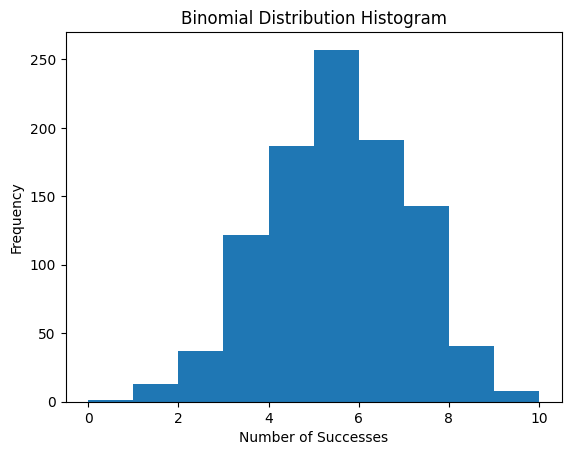

In [2]:
# 7: Simulate binomial distribution and plot histogram
import numpy as np
import matplotlib.pyplot as plt

n = 10
p = 0.5
size = 1000

data = np.random.binomial(n, p, size)

plt.hist(data, bins=10)
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.title("Binomial Distribution Histogram")
plt.show()


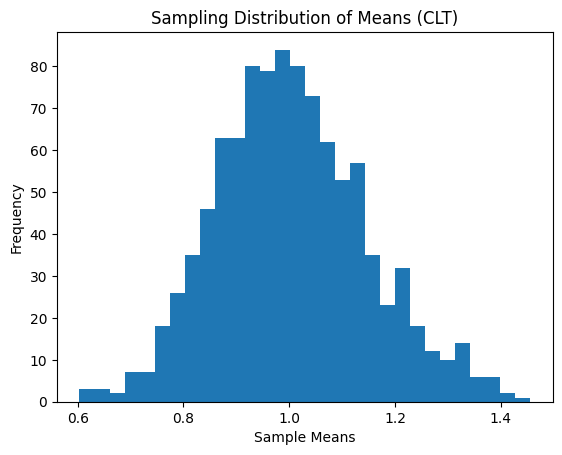

In [3]:
# 8: Central Limit Theorem Simulation
import numpy as np
import matplotlib.pyplot as plt

samples = 1000
sample_size = 50

means = []

for i in range(samples):
    non_normal = np.random.exponential(scale=1, size=sample_size)
    means.append(np.mean(non_normal))

plt.hist(means, bins=30)
plt.title("Sampling Distribution of Means (CLT)")
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.show()


95.0% CI: (13.146348150757273, 15.139366134957012)


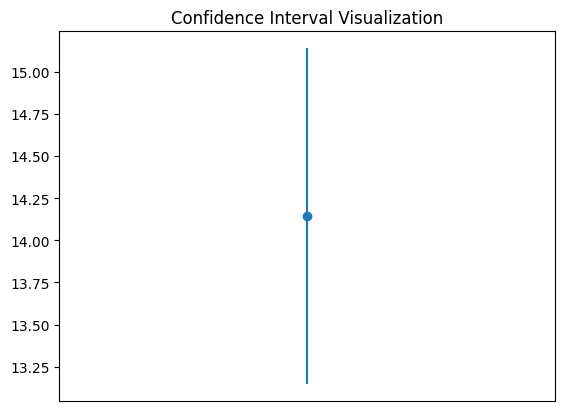

In [4]:
# 9: Function to calculate and visualize CI
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    n = len(data)
    
    z = norm.ppf((1 + confidence) / 2)
    se = std / np.sqrt(n)
    me = z * se
    
    lower = mean - me
    upper = mean + me
    
    print(f"{confidence*100}% CI: ({lower}, {upper})")
    
    # Visualization
    plt.errorbar(1, mean, yerr=me, fmt='o')
    plt.title("Confidence Interval Visualization")
    plt.xticks([])
    plt.show()

data = [12, 15, 14, 16, 13, 14, 15]
confidence_interval(data)


In [6]:
# 10: Chi-square Goodness-of-fit Test
import numpy as np
from scipy.stats import chisquare

observed = np.array([25, 30, 45])
expected = np.array([33.3, 33.3, 33.3])

# Fix: Normalize expected so sums match
expected = expected * (observed.sum() / expected.sum())

chi_stat, p_value = chisquare(observed, expected)

print("Chi-square:", chi_stat)
print("P-value:", p_value)


Chi-square: 6.5
P-value: 0.03877420783172202
